In [19]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# spm_path = '../var/data/SoilParentMaterial/SoilParentMaterialMap.shp'
spm_path = '../var/data/SPMM_1km/SoilParentMateriall_V1_portal1km.shp'

spm = gpd.read_file(spm_path)
spm

,ESB_DESC,CARB_CNTNT,PMM_GRAIN,SOIL_GROUP,SOIL_TEX,SOIL_DEPTH,PMM1K_UID,VERSION,geometry
0,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_1,DPSPM_V1_1km,"POLYGON ((54000.002 784200.004, 54000.002 7843..."
1,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_2,DPSPM_V1_1km,"POLYGON ((54000.002 783200.001, 54000.002 7834..."
2,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_3,DPSPM_V1_1km,"POLYGON ((54000.002 782199.997, 54000.002 7824..."
3,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_4,DPSPM_V1_1km,"POLYGON ((54000.002 781200.003, 54000.002 7813..."
4,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_5,DPSPM_V1_1km,"POLYGON ((54000.002 780199.999, 54000.002 7804..."
...,...,...,...,...,...,...,...,...,...
241509,OUTWASH SAND,NONE,ARENACEOUS,LIGHT(SANDY),SAND,DEEP,bgsn:SPMv1_1k_241510,DPSPM_V1_1km,"POLYGON ((653999.999 290200.000, 653999.999 29..."
241510,EOLIAN SAND,NONE,ARENACEOUS,LIGHT TO MEDIUM,SAND TO LOAM,DEEP,bgsn:SPMv1_1k_241511,DPSPM_V1_1km,"POLYGON ((655000.001 295199.999, 655000.001 29..."
241511,EOLIAN SAND,NONE,ARENACEOUS,LIGHT TO MEDIUM,SAND TO LOAM,DEEP,bgsn:SPMv1_1k_241512,DPSPM_V1_1km,"POLYGON ((655000.001 294199.995, 655000.001 29..."
241512,EOLIAN SAND,NONE,ARENACEOUS,LIGHT TO MEDIUM,SAND TO LOAM,DEEP,bgsn:SPMv1_1k_241513,DPSPM_V1_1km,"POLYGON ((655000.001 293200.002, 655000.001 29..."


/home/ds/src/geomap/.venv/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

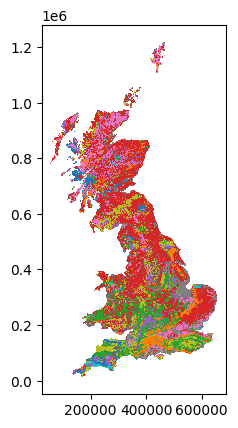

In [22]:
spm.plot(column='ESB_DESC')

In [13]:
spm['area'] = spm['geometry'].area
spm.groupby('ESB_DESC')['area'].sum().reset_index(name='area').sort_values(by='area', ascending=False)

,ESB_DESC,area
57,GLACIAL TILL,7.461500e+10
36,CLAYSTONE/MUDSTONE,2.099500e+10
94,PEAT,1.337100e+10
125,SANDSTONE,1.267500e+10
89,MUDSTONE AND SANDSTONE,9.788001e+09
...,...,...
87,MUDSTONE AND DOLOMITE,9.999977e+05
3,ACID TO INTERMEDIATE VOLCANIC ROCKS,9.999977e+05
65,GRANODIORITE AND DIORITE,9.999977e+05
74,LIMESTONE AND CLASTIC ROCKS,9.999960e+05


In [15]:
spm[spm['ESB_DESC']=='BASALT']

,ESB_DESC,CARB_CNTNT,PMM_GRAIN,SOIL_GROUP,SOIL_TEX,SOIL_DEPTH,PMM1K_UID,VERSION,geometry,area
2432,BASALT,NONE,FINE,LIGHT(SANDY) TO MEDIUM(SANDY),LOAM TO SANDY LOAM,SHALLOW,bgsn:SPMv1_1k_2433,DPSPM_V1_1km,"POLYGON ((114000.004 846199.997, 114000.004 84...",9.999877e+05
2747,BASALT,NONE,FINE,LIGHT(SANDY) TO MEDIUM(SANDY),LOAM TO SANDY LOAM,SHALLOW,bgsn:SPMv1_1k_2748,DPSPM_V1_1km,"POLYGON ((117999.996 854199.997, 117999.996 85...",9.999960e+05
2748,BASALT,NONE,FINE,LIGHT(SANDY) TO MEDIUM(SANDY),LOAM TO SANDY LOAM,SHALLOW,bgsn:SPMv1_1k_2749,DPSPM_V1_1km,"POLYGON ((117999.996 853200.003, 117999.996 85...",1.000006e+06
2842,BASALT,NONE,FINE,LIGHT(SANDY) TO MEDIUM(SANDY),LOAM TO SANDY LOAM,SHALLOW,bgsn:SPMv1_1k_2843,DPSPM_V1_1km,"POLYGON ((118999.998 854199.997, 118999.998 85...",9.999960e+05
2861,BASALT,NONE,FINE,LIGHT(SANDY) TO MEDIUM(SANDY),LOAM TO SANDY LOAM,SHALLOW,bgsn:SPMv1_1k_2862,DPSPM_V1_1km,"POLYGON ((118999.998 800200.004, 118999.998 80...",9.999960e+05
...,...,...,...,...,...,...,...,...,...,...
135577,BASALT,NONE,FINE,LIGHT(SANDY) TO MEDIUM(SANDY),LOAM TO SANDY LOAM,SHALLOW,bgsn:SPMv1_1k_135578,DPSPM_V1_1km,"POLYGON ((371000.001 638199.996, 371000.001 63...",9.999960e+05
136324,BASALT,NONE,FINE,LIGHT(SANDY) TO MEDIUM(SANDY),LOAM TO SANDY LOAM,SHALLOW,bgsn:SPMv1_1k_136325,DPSPM_V1_1km,"POLYGON ((372000.003 605200.003, 372000.003 60...",9.999977e+05
139520,BASALT,NONE,FINE,LIGHT(SANDY) TO MEDIUM(SANDY),LOAM TO SANDY LOAM,SHALLOW,bgsn:SPMv1_1k_139521,DPSPM_V1_1km,"POLYGON ((376000.004 239199.999, 376000.004 23...",9.999977e+05
160321,BASALT,NONE,FINE,MEDIUM TO LIGHT(SILTY) TO HEAVY,LOAM TO SANDY LOAM,SHALLOW,bgsn:SPMv1_1k_160322,DPSPM_V1_1km,"POLYGON ((408000.001 375199.999, 408000.001 37...",1.000006e+06
